### Student Information
Name:賴逸修

Student ID:106062607

GitHub ID:ParkerLai

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Part 1: Take Home Exercises

In [1]:
### Begin Assignment Here!
### import some necessary stuffs
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import math
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# necessary for when working with external scripts
%reload_ext autoreload
%autoreload 2

# categories which exercises may use
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label 
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [2]:
X.loc[lambda f: f.category == 1].iloc[::10, 0:2][0:5]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1
172,From: thinman@netcom.com (Technically Sweet) S...,1


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
# Answer here
#若該missing valus 是以'xxx'字串形式表示
#則用.isnull()會抓不到，因為'xxx'中的xxx會被認為是資料

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [4]:
X[10:30][["text", "category_name"]]
print(X.category_name.value_counts())

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


In [5]:
X_sample = X.sample(n=1000, replace=True)
X_sample

,text,category,category_name
1224,From: ski@wpi.WPI.EDU (Joseph Mich Krzeszewski...,2,sci.med
587,From: tedr@athena.cs.uga.edu (Ted Kalivoda) Su...,3,soc.religion.christian
24,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1,comp.graphics
446,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,0,alt.atheism
1885,From: dewey@risc.sps.mot.com (Dewey Henize) Su...,0,alt.atheism
567,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
863,From: dxf12@po.cwru.edu (Douglas Fowler) Subje...,3,soc.religion.christian
1088,From: mangoe@cs.umd.edu (Charley Wingate) Subj...,0,alt.atheism
844,From: doug@hparc0.aus.hp.com (Doug Parsons) Su...,1,comp.graphics
92,From: bolson@carson.u.washington.edu (Edward B...,1,comp.graphics


In [6]:
X[10:30][["text", "category_name"]]

,text,category_name
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,soc.religion.christian
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,comp.graphics
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,alt.atheism
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,comp.graphics
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",sci.med
17,Organization: Penn State University From: <JSN...,alt.atheism
18,From: tom_milligan@rainbow.mentorg.com Subject...,soc.religion.christian
19,Subject: Re: Don't more innocents die without ...,alt.atheism


In [7]:
# Answer here

# X前後並無改變
# 因為在取 sample時也是assign到 X_sample
# 另外中間雖有新增錯誤資料到X中
# 但也透過X.dropna與X.drop_duplicates進行修正
# 因此X並無改變

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

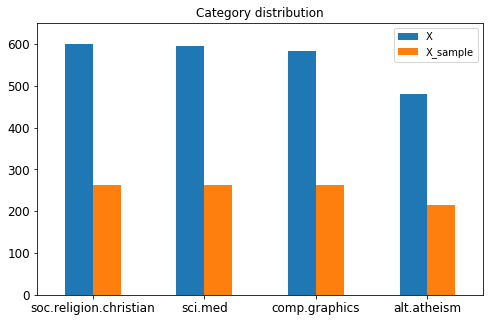

In [8]:
# Answer here
X_value = []
X_sample_value = []

for t in range(len(X.category_name.value_counts())):
    X_value.append(X.category_name.value_counts()[t])

for t in range(len(X_sample.category_name.value_counts())):
    X_sample_value.append(X_sample.category_name.value_counts()[t])

df = pd.DataFrame({'X': X_value, 'X_sample': X_sample_value})
df = df.set_index([['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism']])
df.plot(kind = 'bar',
            title = 'Category distribution',
            ylim = [0, 650], 
            rot = 0, fontsize = 12, figsize = (8,5));


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# Answer here
a = X_counts[4, 0:100].toarray()
for t in range(len(a[0])):
    if a[0][t] == 1:
        print(count_vect.get_feature_names()[t])

00
01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

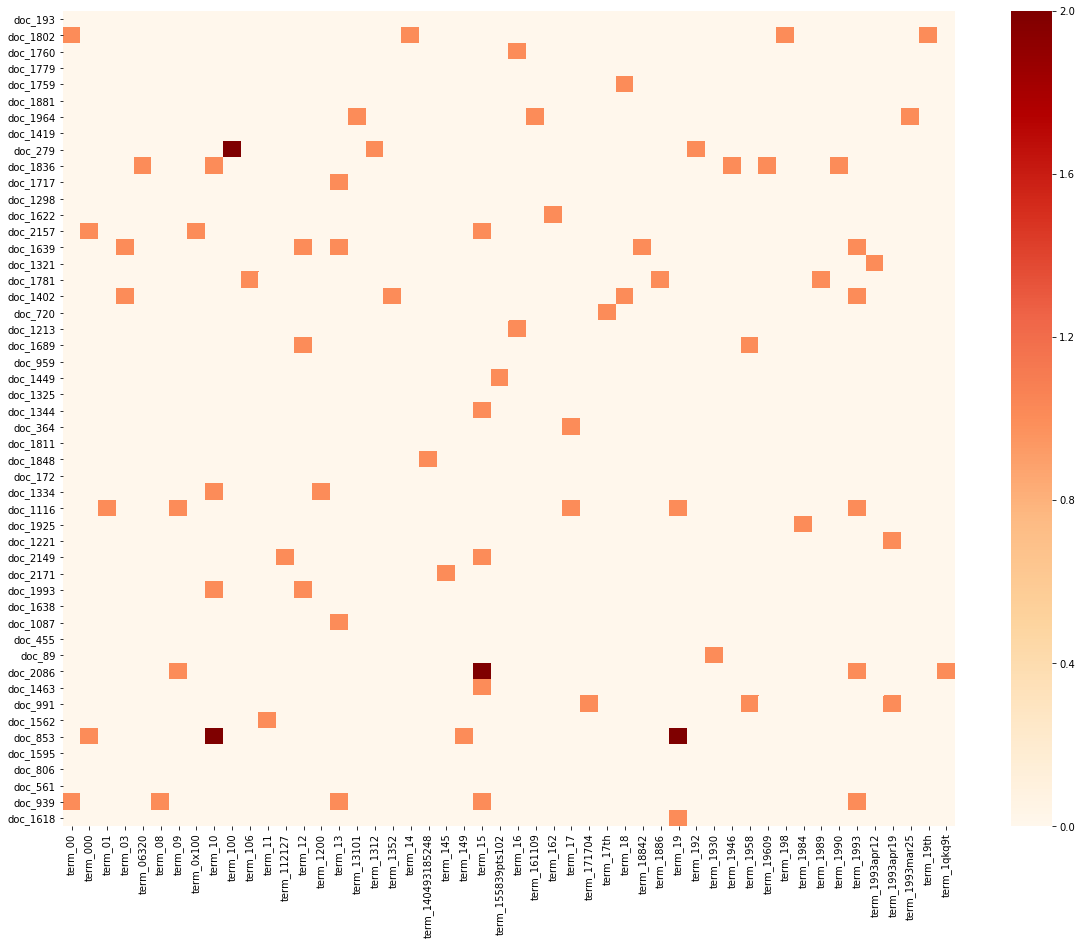

In [10]:
# Answer here

# 使用隨機取樣進行觀測

sample_counts = 50;
X_Sample = X.sample(n = sample_counts)

count_vect_sample = CountVectorizer()
X_Sample_counts = count_vect_sample.fit_transform(X_Sample.text)

plot_x = ["term_"+str(i) for i in count_vect_sample.get_feature_names()[0:sample_counts]]
plot_y = ["doc_"+ str(i) for i in list(X_Sample.index)[0:sample_counts]]
plot_z = X_Sample_counts[0:sample_counts, 0:sample_counts].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw,
                 cmap="OrRd",
                 vmin=0, annot=False)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

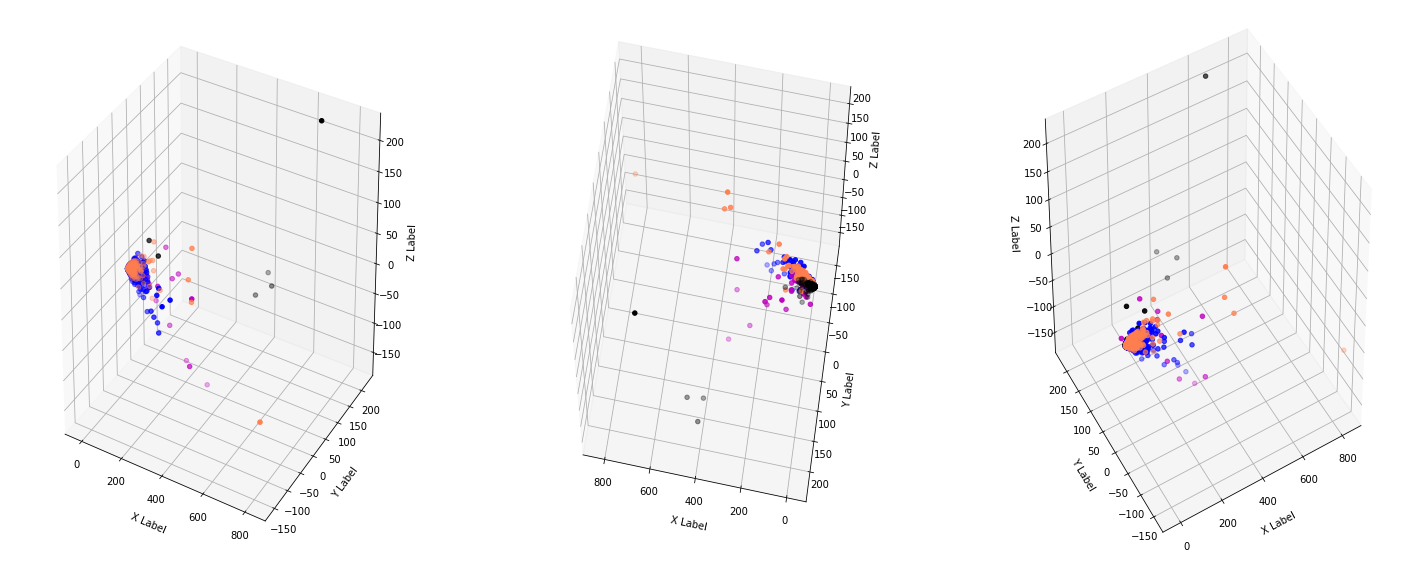

In [11]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_reduced_to_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# Plot three figures
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(131, projection = '3d')
ax1 = fig.add_subplot(132, projection = '3d')
ax2 = fig.add_subplot(133, projection = '3d')

for c, category in zip(col, categories):
    xs = X_reduced_to_3[X['category_name'] == category].T[0]
    ys = X_reduced_to_3[X['category_name'] == category].T[1]
    zs = X_reduced_to_3[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker = 'o')
    ax1.scatter(xs, ys, zs, c = c, marker = 'o')
    ax2.scatter(xs, ys, zs, c = c, marker = 'o')


ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

# Change the view point
ax1.view_init(60, 100)
ax2.view_init(40, 240)
plt.show()

## The 3d figure shows more angles wh

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above.

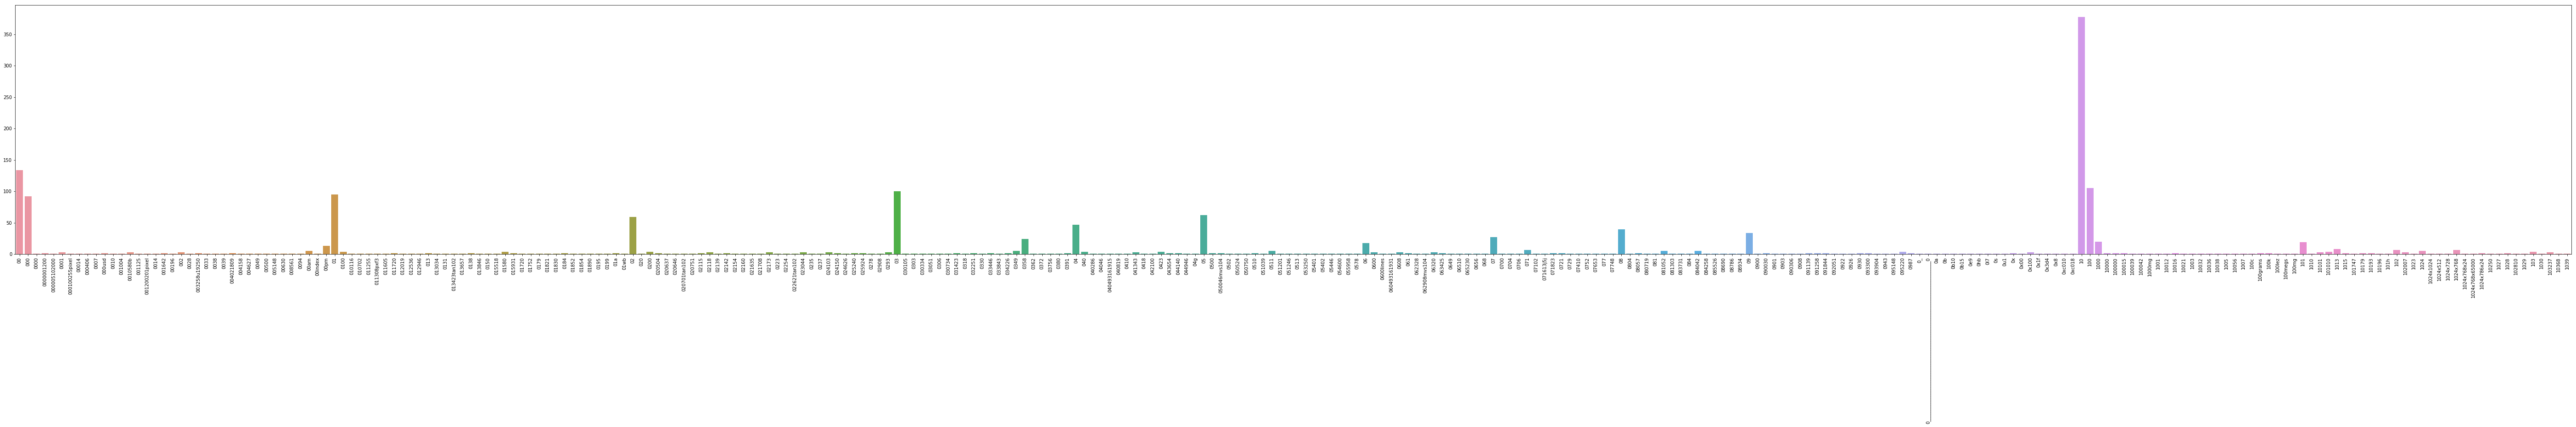

In [12]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

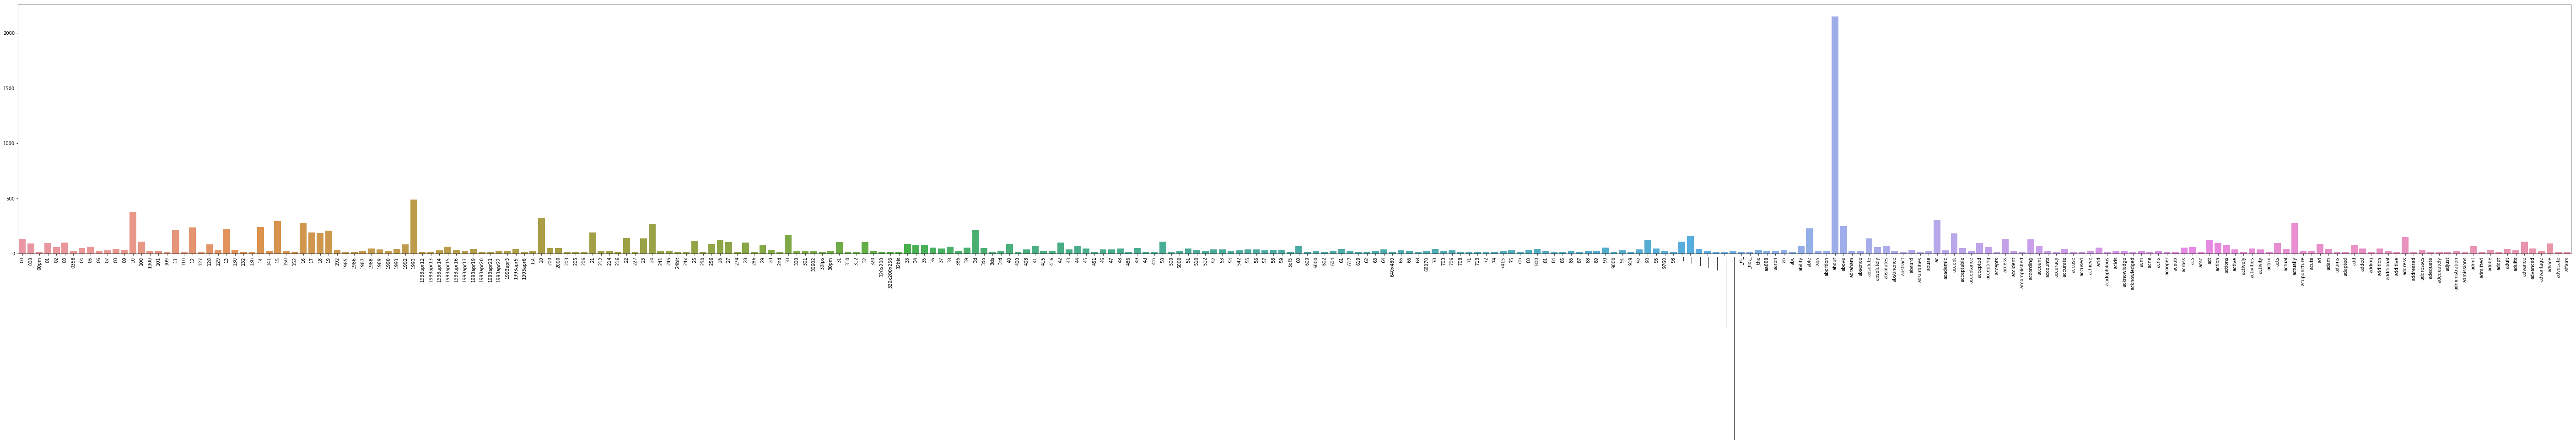

In [13]:
# Answer here
#透過調整threshold排除frequencies太低的word
threshold = 10

new_term_frequencies = []
new_feature_names = []
old_feature_names = count_vect.get_feature_names()

for j in range(len(term_frequencies)):
    if term_frequencies[j] > threshold:
        new_term_frequencies.append(term_frequencies[j])
        new_feature_names.append(old_feature_names[j])

        
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=new_feature_names[:300], 
            y=new_term_frequencies[:300])
g.set_xticklabels(new_feature_names[:300], rotation = 90);



### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

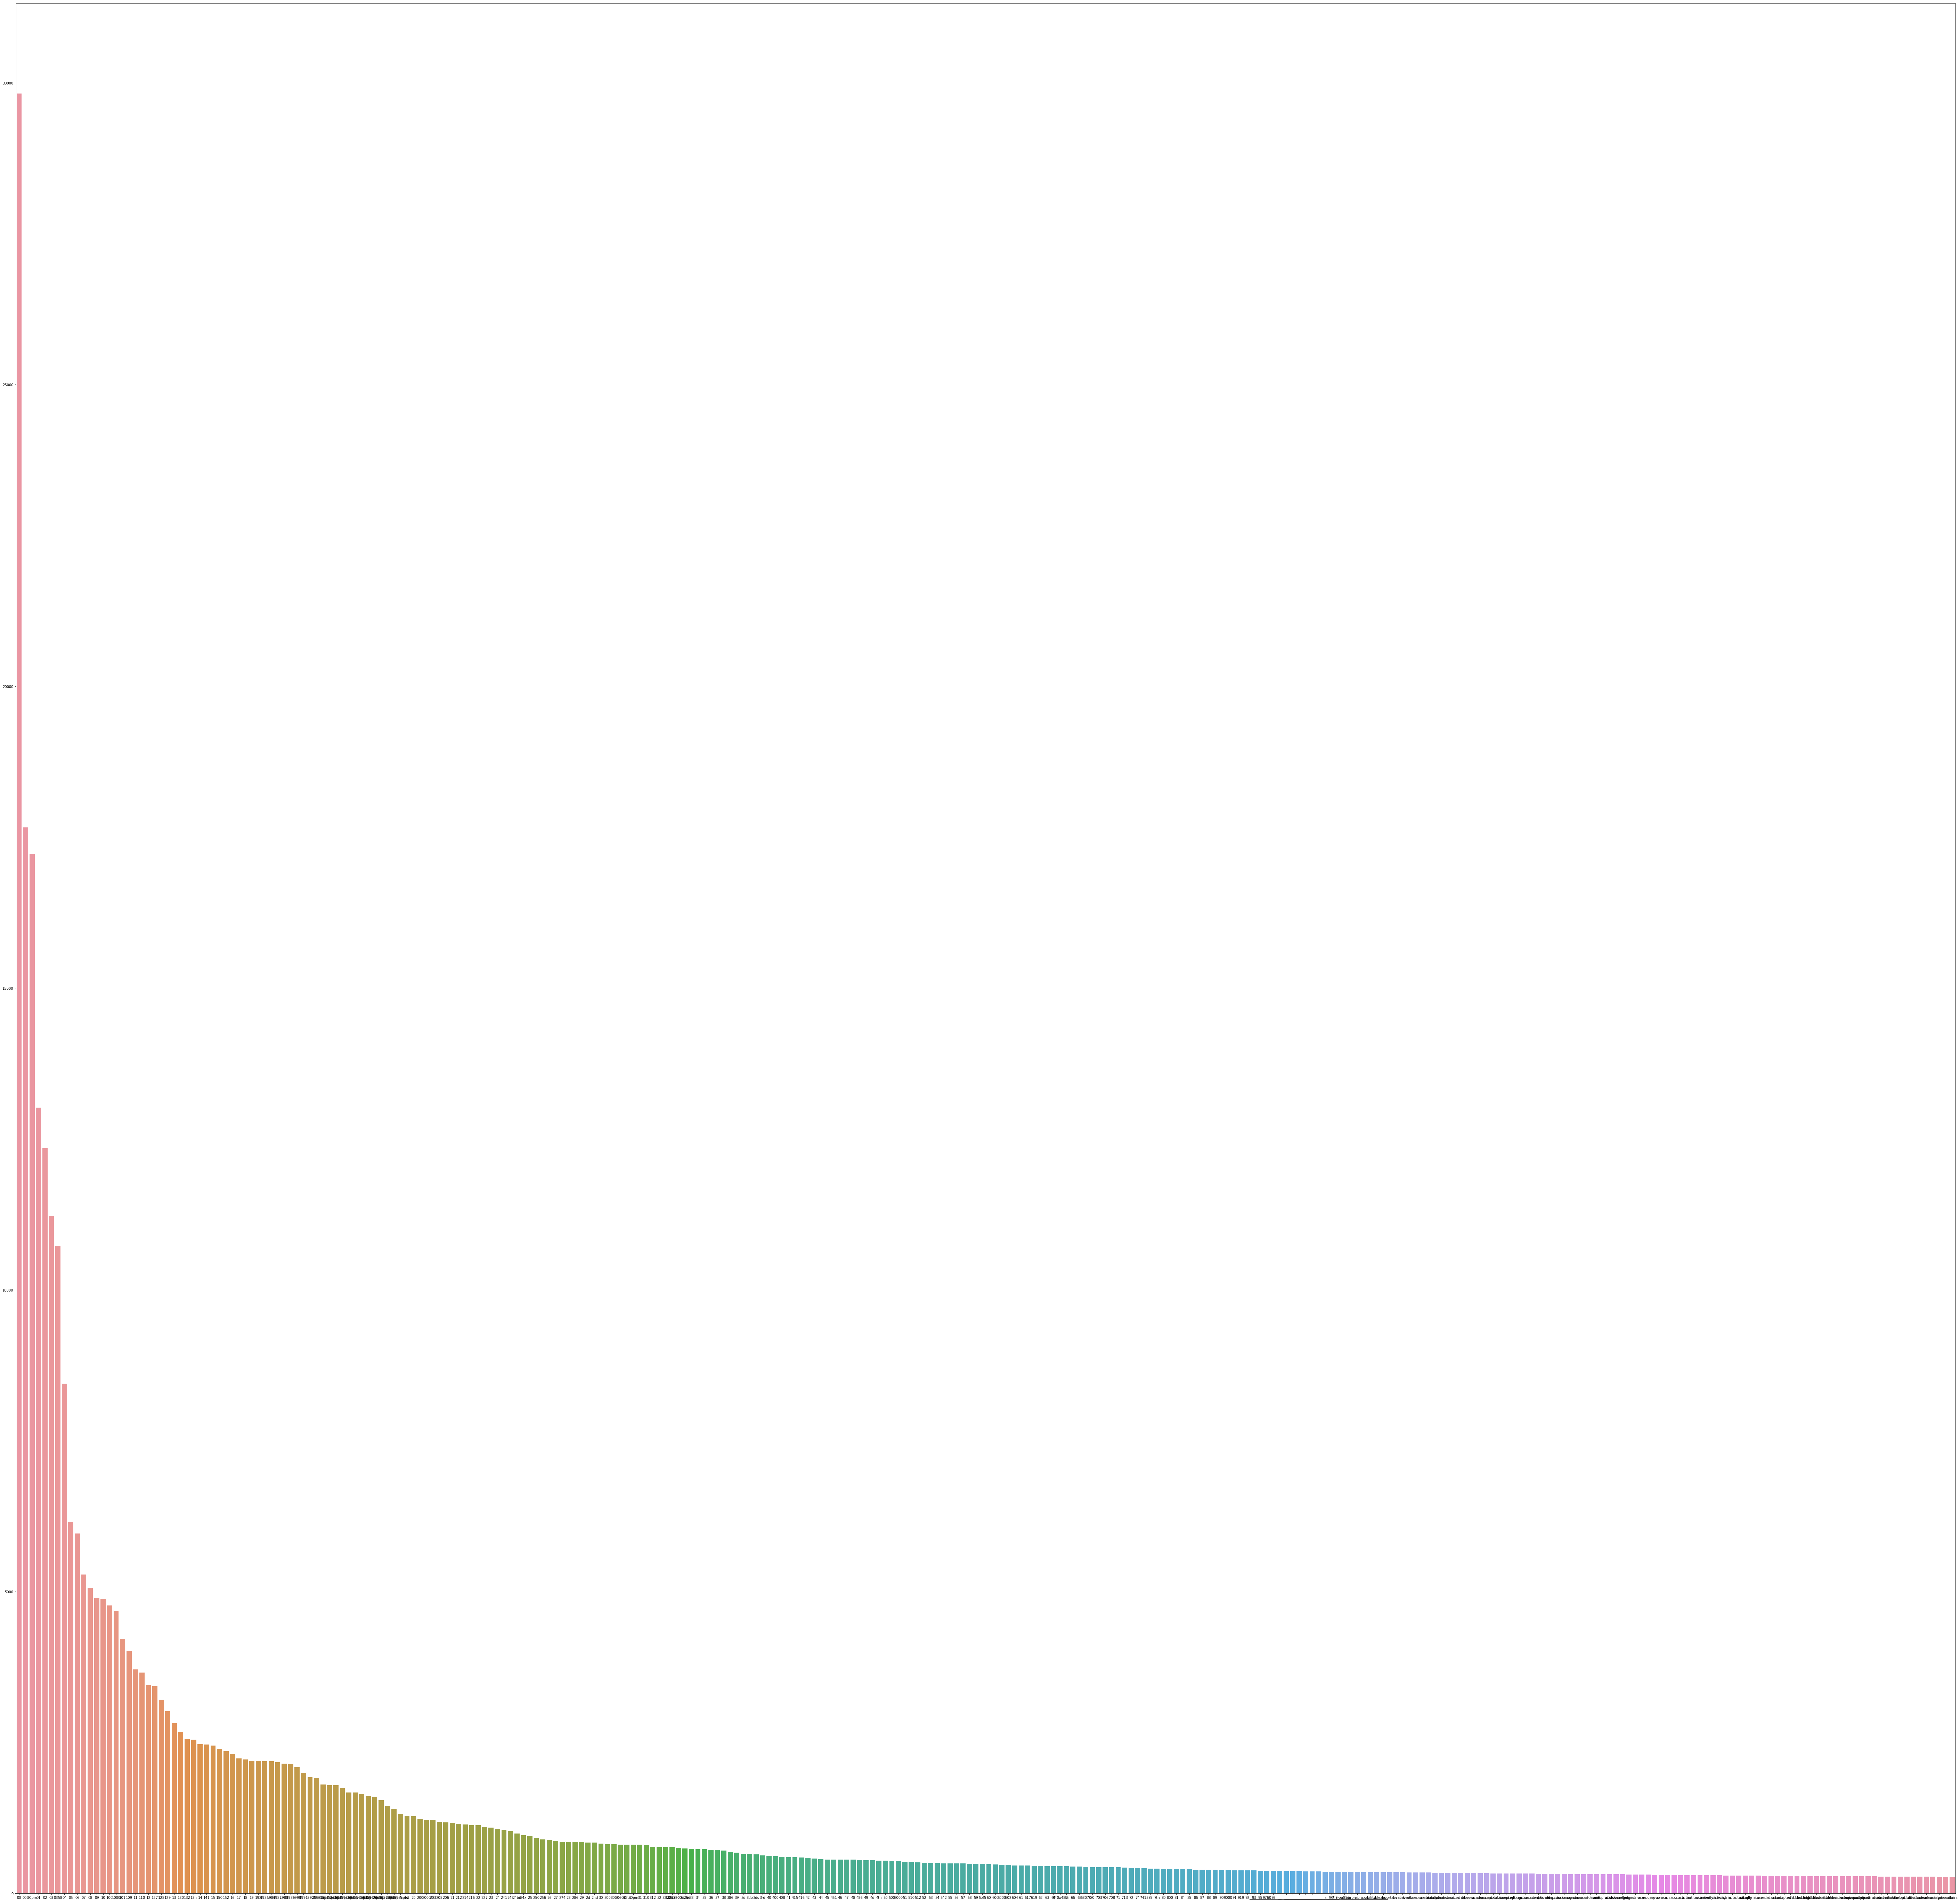

In [14]:
# Answer here
new_term_frequencies.sort(reverse=True)

plt.subplots(figsize=(100, 100))
g = sns.barplot(x=new_feature_names[:300], 
            y=new_term_frequencies[:300])

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [15]:
# Answer here
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# Part 2: New dataset(Lab 1 operations)

In [16]:
### Begin Assignment Here!
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
imdb_labelled_input = []
amazon_cells_labelled_input = []
yelp_labelled_input = []
#read the three file
f = open('imdb_labelled.txt', 'r', encoding = 'UTF-8')
while True :
       i = f.readline()
       if i=='': break
       imdb_labelled_input.append(i)
f = open('amazon_cells_labelled.txt', 'r', encoding = 'UTF-8')
while True :
       i = f.readline()
       if i=='': break
       amazon_cells_labelled_input.append(i)
f = open('yelp_labelled.txt', 'r', encoding = 'UTF-8')
while True :
       i = f.readline()
       if i=='': break
       yelp_labelled_input.append(i)
f.close()

In [18]:
imdb_labelled_input

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0\n',
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  \t0\n',
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  \t0\n',
 'Very little music or anything to speak of.  \t0\n',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  \t1\n',
 "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  \t0\n",
 'Wasted two hours.  \t0\n',
 'Saw the movie today and thought it was a good effort, good messages for kids.  \t1\n',
 'A bit predictable.  \t0\n',
 'Loved the casting of Jimmy Buffet as the science teacher.  \t1\n',
 'And those baby owls were adorable.  \t1\n',
 "The movie showed a lot of Florida a

In [19]:
amazon_cells_labelled_input

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n',
 'Great for the jawbone.\t1\n',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n',
 'The mic is great.\t1\n',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n',
 'If you are Razr owner...you must have this!\t1\n',
 'Needless to say, I wasted my money.\t0\n',
 'What a waste of money and time!.\t0\n',
 'And the sound quality is great.\t1\n',
 'He was very impressed when going from the original battery to the extended battery.\t1\n',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\n',
 'Very good quality though\t1\n',
 'The design is very odd, as the ear "clip" is not very comfortable at all.\t0\n',
 'H

In [20]:
yelp_labelled_input

['Wow... Loved this place.\t1\n',
 'Crust is not good.\t0\n',
 'Not tasty and the texture was just nasty.\t0\n',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\n',
 'The selection on the menu was great and so were the prices.\t1\n',
 'Now I am getting angry and I want my damn pho.\t0\n',
 "Honeslty it didn't taste THAT fresh.)\t0\n",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\n',
 'The fries were great too.\t1\n',
 'A great touch.\t1\n',
 'Service was very prompt.\t1\n',
 'Would not go back.\t0\n',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\n',
 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1\n',
 'I was disgusted because I was pretty sure that was human hair.\t0\n',
 'I was shocked because no signs indicate cash only.\t0\n',
 'Highly recommended.\t1\n',
 'Waitress was a little slow in servi

In [21]:
len(imdb_labelled_input)

1000

In [22]:
len(amazon_cells_labelled_input)

1000

In [23]:
len(yelp_labelled_input)

1000

In [24]:
import pandas as pd
import numpy as np
# my functions
import helpers.data_mining_helpers as dmh

#put all inputs together
for i in range(len(amazon_cells_labelled_input)):
   imdb_labelled_input.append(amazon_cells_labelled_input[i]) 

for i in range(len(yelp_labelled_input)):
   imdb_labelled_input.append(yelp_labelled_input[i]) 

X = pd.DataFrame.from_records(dmh.format_rows_hw(imdb_labelled_input), columns= ['sentence'])
len(imdb_labelled_input)

3000

In [25]:
X[0:2]

,sentence
0,"A very, very, very slow-moving, aimless movie ..."
1,Not sure who was more lost - the flat characte...


In [26]:
X['score'] = list(map(int, dmh.format_score(imdb_labelled_input)))
X[0:2]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0


In [27]:
X.loc[lambda f: f.score == 0].iloc[::10, :][0:5]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
34,Today the graphics are crap.,0
48,"But whatever it was that cost them so much, it...",0
70,"And, quite honestly, often its not very good.",0
102,"The acting was bad, the dialogs were extremely...",0


In [28]:
X.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [29]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [30]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

In [31]:
#add a dummy data but not in x 
dummy_series = pd.Series(["dummy_record", ], index=["sentence"])
dummy_series

sentence    dummy_record
dtype: object

In [32]:
result_with_series = X.append(dummy_series, ignore_index=True)
len(result_with_series)
result_with_series

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0.0
1,Not sure who was more lost - the flat characte...,0.0
2,Attempting artiness with black & white and cle...,0.0
3,Very little music or anything to speak of.,0.0
4,The best scene in the movie was when Gerardo i...,1.0
5,"The rest of the movie lacks art, charm, meanin...",0.0
6,Wasted two hours.,0.0
7,Saw the movie today and thought it was a good ...,1.0
8,A bit predictable.,0.0
9,Loved the casting of Jimmy Buffet as the scien...,1.0


In [33]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 1)
dtype: object

In [34]:
#add a dummy data to X
dummy_dict = [{'sentence': 'dummy_record'}]
X = X.append(dummy_dict, ignore_index=True)

C:\Users\ParkerLai\Anaconda3\lib\site-packages\pandas\core\frame.py:5186: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  other = other.loc[:, self.columns]
C:\Users\ParkerLai\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [35]:
len(X)

3001

In [36]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 1)
dtype: object

In [37]:
#delete the dummy data
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [38]:
len(X)

3000

In [39]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [40]:
#there are 17 duplicate data
sum(X.duplicated())

17

In [41]:
#delete them
X.drop_duplicates(keep=False, inplace=True)
len(X)

2966

In [42]:
#random access 500 datas
X_sample = X.sample(n=500)
len(X_sample)

500

In [43]:
X_sample[0:4]

,sentence,score
1028,People couldnt hear me talk and I had to pull ...,0.0
2052,Their chow mein is so good!,1.0
1967,Beautiful styling though.,1.0
290,"Camerawork - again, bad.",0.0


0.0    1486
1.0    1480
Name: score, dtype: int64


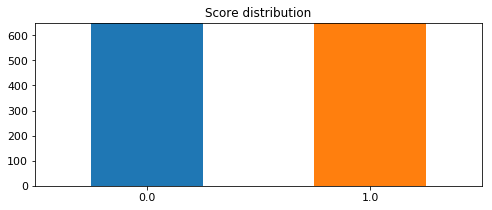

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

print(X.score.value_counts())

# plot barchart for X_sample
X.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

0.0    256
1.0    244
Name: score, dtype: int64


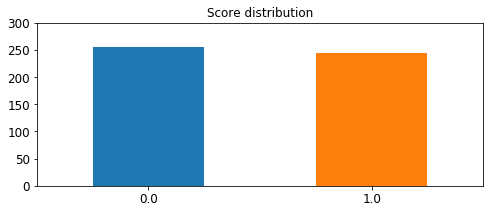

In [45]:
print(X_sample.score.value_counts())

# plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

0.0    256
1.0    244
Name: score, dtype: int64


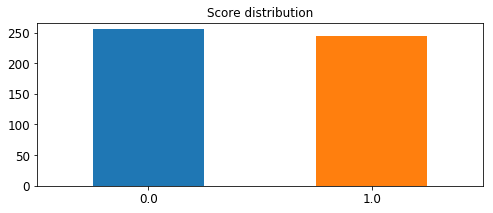

In [46]:
#Not a hard code
upper_bound = max(X_sample.score.value_counts()) + 10

print(X_sample.score.value_counts())

# plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

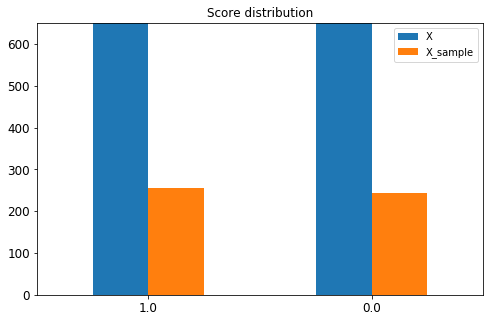

In [47]:
#put the data together
X_value = []
X_sample_value = []

for t in range(len(X.score.value_counts())):
    X_value.append(X.score.value_counts()[t])

for t in range(len(X_sample.score.value_counts())):
    X_sample_value.append(X_sample.score.value_counts()[t])

df = pd.DataFrame({'X': X_value, 'X_sample': X_sample_value})
df = df.set_index([['1.0', '0.0']])
df.plot(kind = 'bar',
            title = 'Score distribution',
            ylim = [0, 650], 
            rot = 0, fontsize = 12, figsize = (8,5));

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

X_counts

<2966x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 31452 stored elements in Compressed Sparse Row format>

In [49]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[:1].sentence)))

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [50]:
X_counts.shape

(2966, 5153)

In [51]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [52]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [53]:
#see what the feature is
a = X_counts[0, 0:100].toarray()
for t in range(len(a[0])):
    if a[0][t] == 1:
        print(count_vect.get_feature_names()[t])

about


In [54]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
count_vect.transform(['Something 10 completely new.']).toarray()

array([[0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

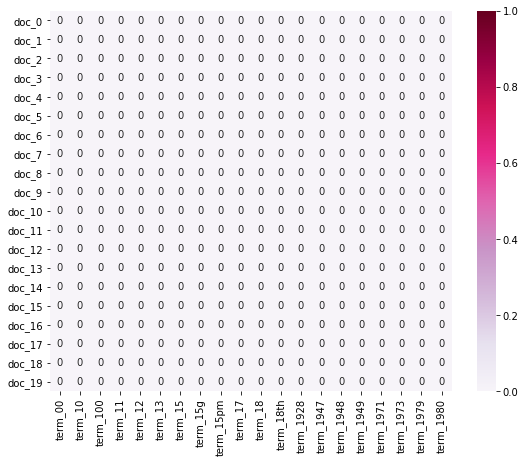

In [57]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

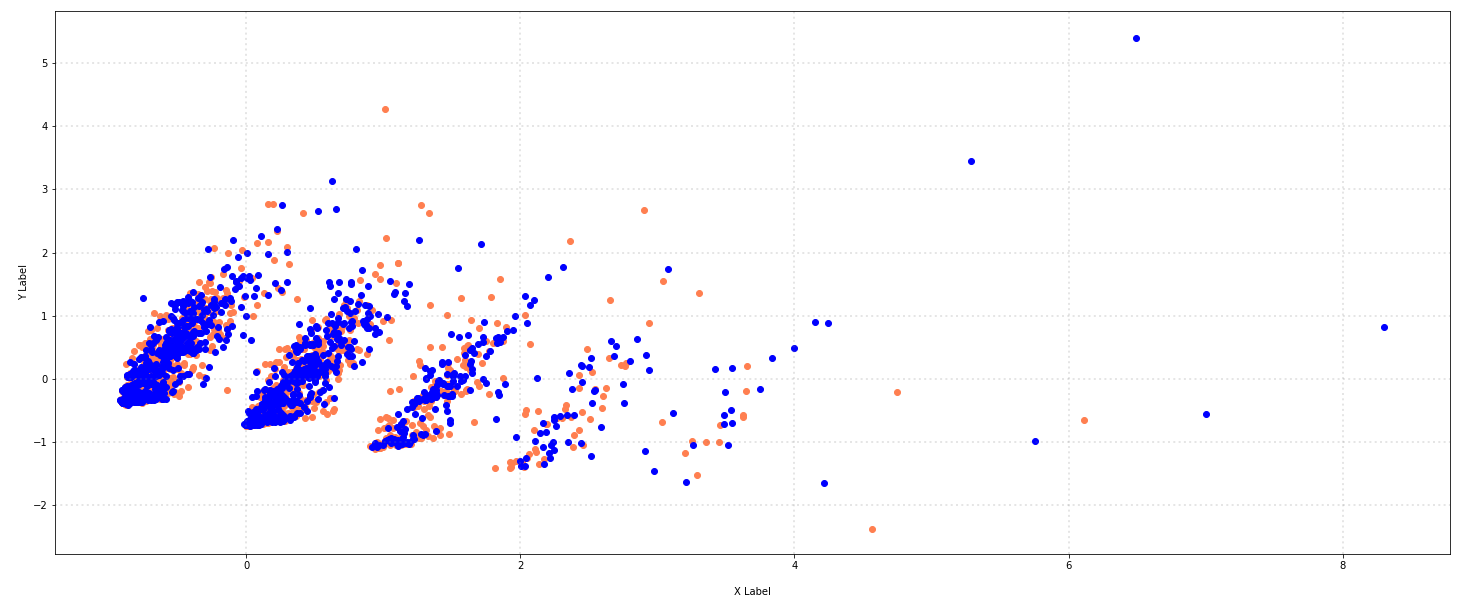

In [58]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

col = ['coral', 'blue', 'black', 'm']
score_table = [0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, scare_temp in zip(col, score_table):
    xs = X_reduced[X['score'] == scare_temp].T[0]
    ys = X_reduced[X['score'] == scare_temp].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

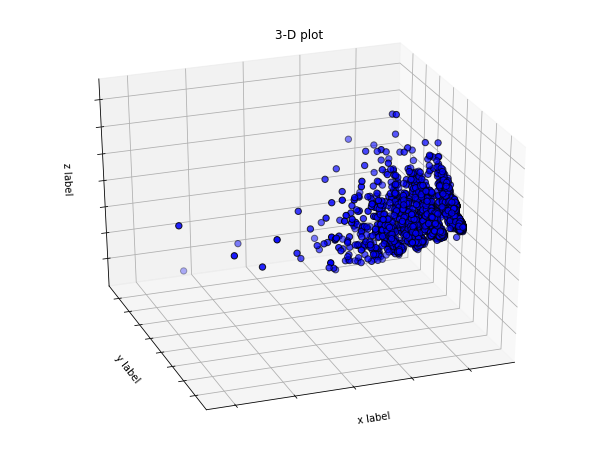

In [59]:
#3D version
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=c,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("3-D plot")
ax.set_xlabel("x label")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y label")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z label")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [60]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_frequencies[0]

1

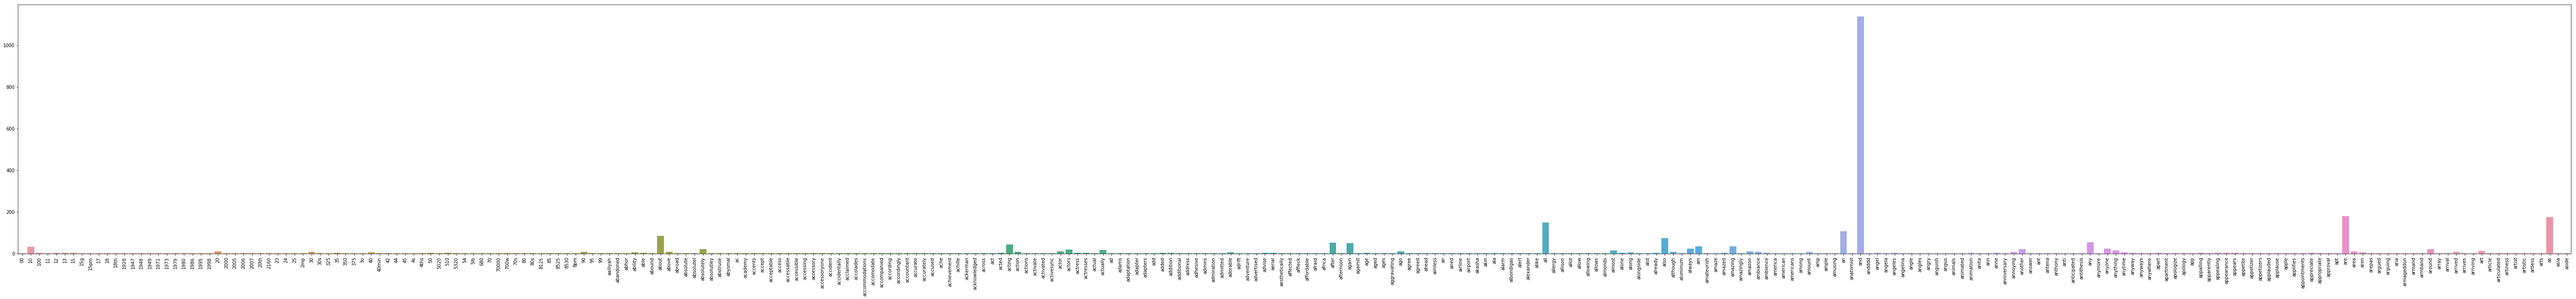

In [61]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

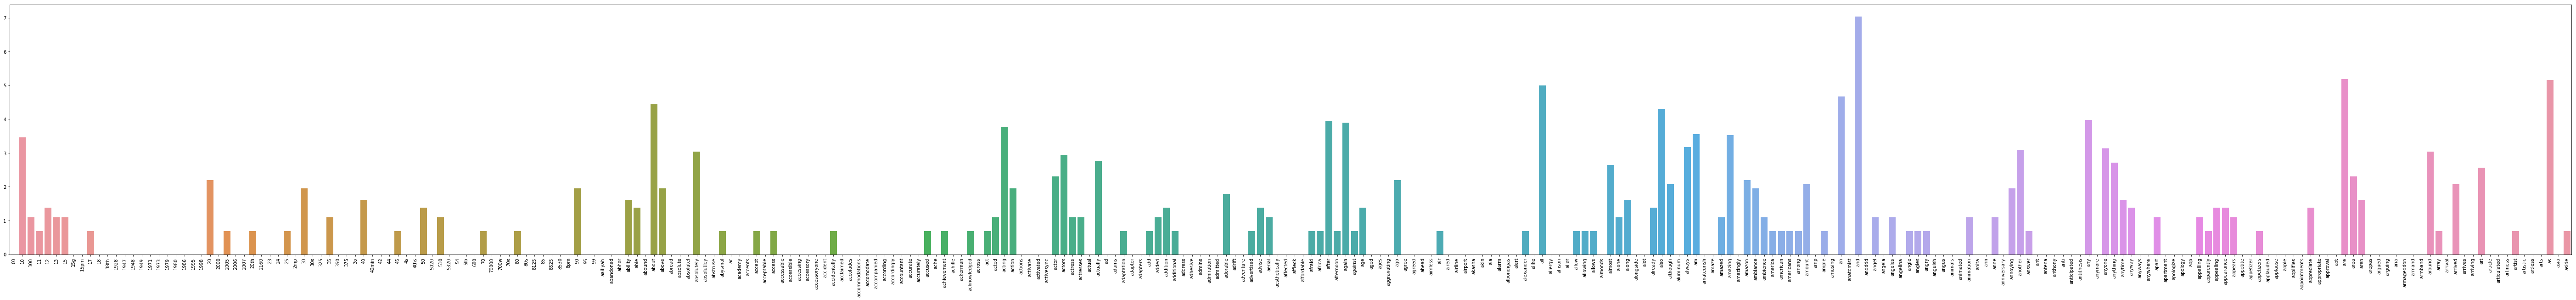

In [62]:
#use log
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [63]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [64]:
mlb.classes_

array([0., 1.])

In [65]:
X['bin_score'] = mlb.transform(X['score']).tolist()
X[0:9]

,sentence,score,bin_score
0,"A very, very, very slow-moving, aimless movie ...",0.0,[0]
1,Not sure who was more lost - the flat characte...,0.0,[0]
2,Attempting artiness with black & white and cle...,0.0,[0]
3,Very little music or anything to speak of.,0.0,[0]
4,The best scene in the movie was when Gerardo i...,1.0,[1]
5,"The rest of the movie lacks art, charm, meanin...",0.0,[0]
6,Wasted two hours.,0.0,[0]
7,Saw the movie today and thought it was a good ...,1.0,[1]
8,A bit predictable.,0.0,[0]


# Part 3: New dataset & Your new operations

# New data visualizations

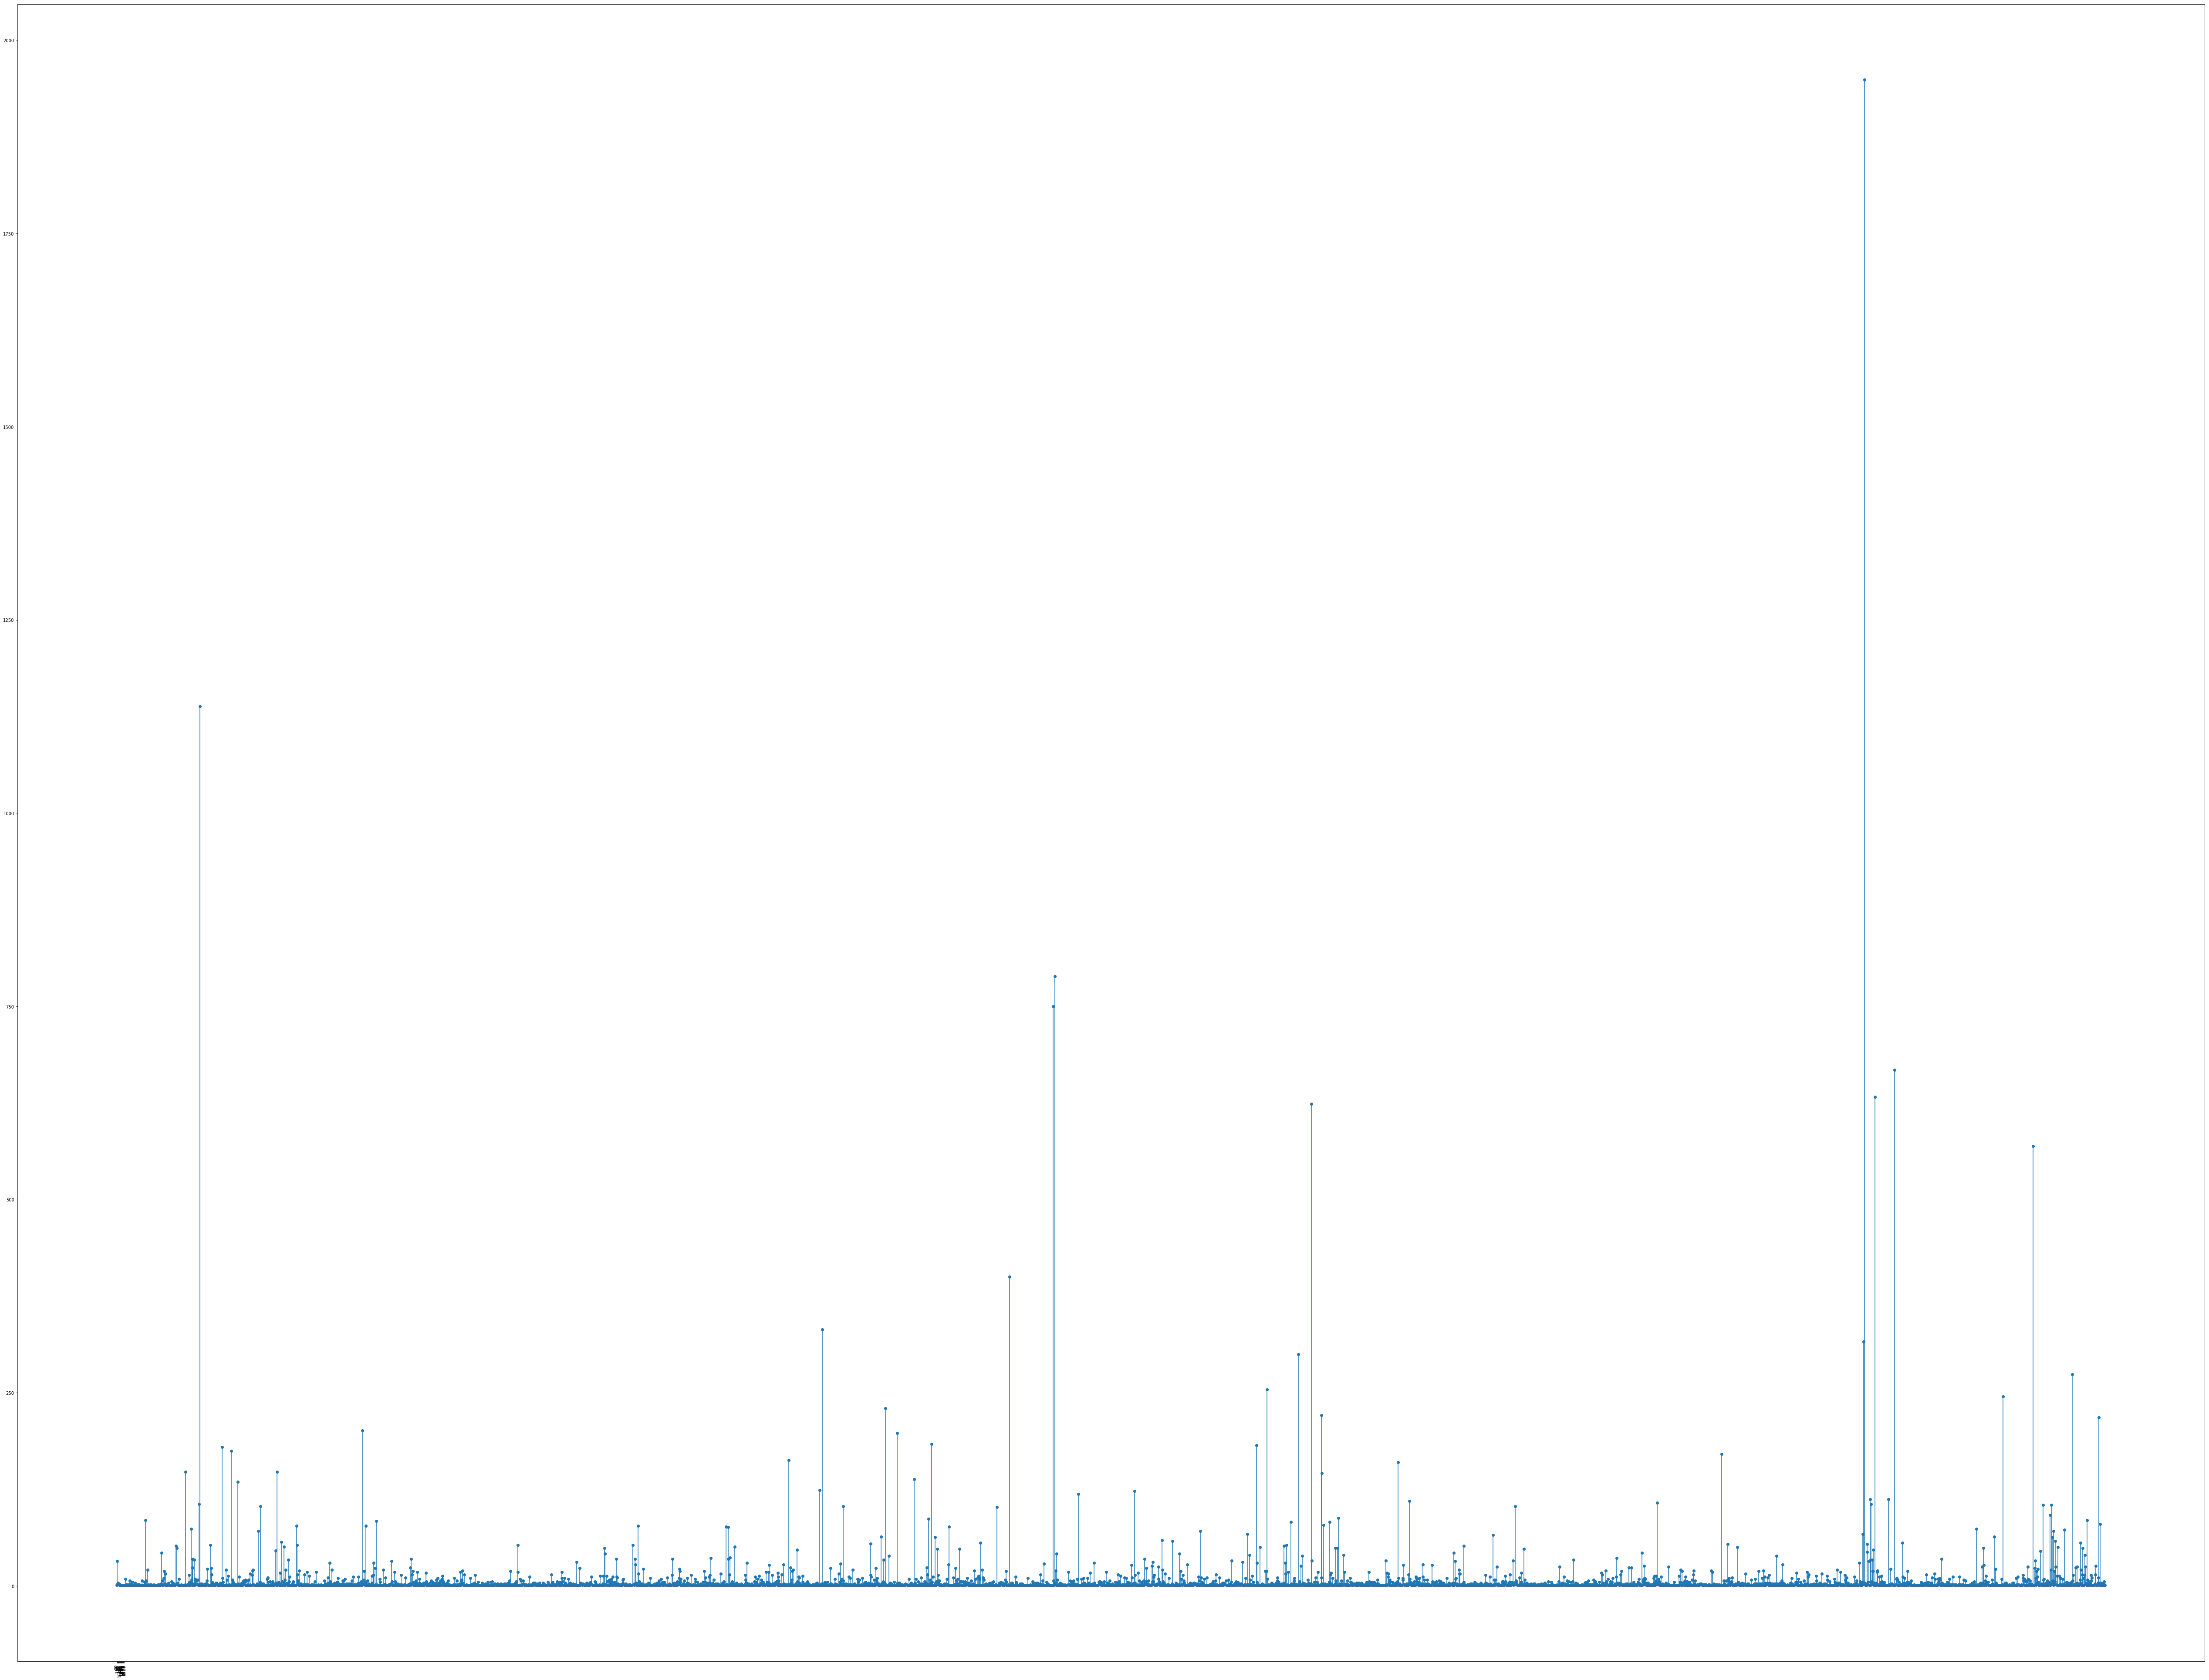

In [66]:
# Create a dataframe
import pandas as pd

new_z = X_counts[0:1, 0:100].toarray()
for t in range(len(plot_z)):
    for k in range(len(plot_z)):
        new_z[0][t] += plot_z[k][t]
newzz = new_z[0]    
newzz = newzz.tolist()
 
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# Make the plot
plt.subplots(figsize=(90, 70))
y_pos = np.arange(20)
plt.stem(term_frequencies.tolist())
plt.xticks(y_pos, count_vect.get_feature_names()[:300], rotation = 90)
#plt.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);
plt.show()


# Generate TF-IDF features

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tf = vectorizer.fit_transform(X.sentence)
print(vectorizer.get_feature_names())


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', '

In [68]:
print(X_tf.shape)

(2966, 5153)


In [69]:
X_tf[0:5, 0:100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

# Similarity between random sentences and report results

In [70]:
## Samplp 20 samples from news_data_set
similarity_data = X.sample(n = 20)

## Word Frquency
wf_count_vect = CountVectorizer()
wf_counts = wf_count_vect.fit_transform(similarity_data.sentence)

## TF-IDF
tf_vectorizer = TfidfVectorizer()
tf_counts = tf_vectorizer.fit_transform(similarity_data.sentence)


# Euclidean distance

# Word frequency

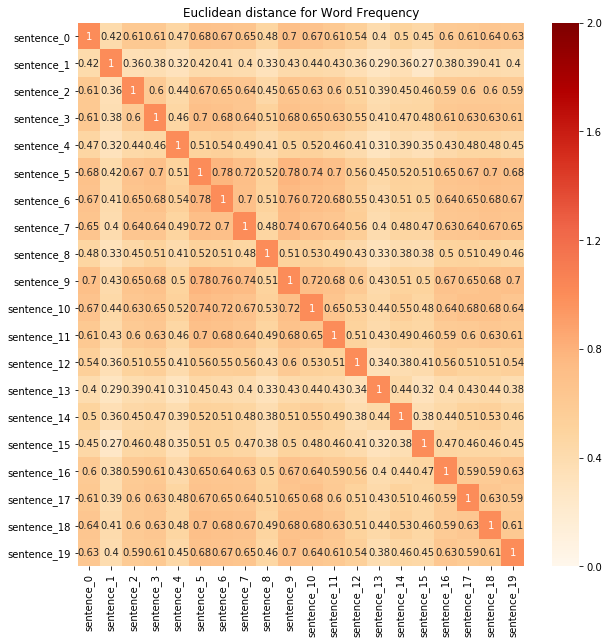

In [71]:
from sklearn.metrics.pairwise import euclidean_distances

ed = euclidean_distances(wf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, 10)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Euclidean distance for Word Frequency')
ax = sns.heatmap(df_todraw,cmap = "OrRd", vmin = 0, vmax = 2, annot = True)

# TF-IDF

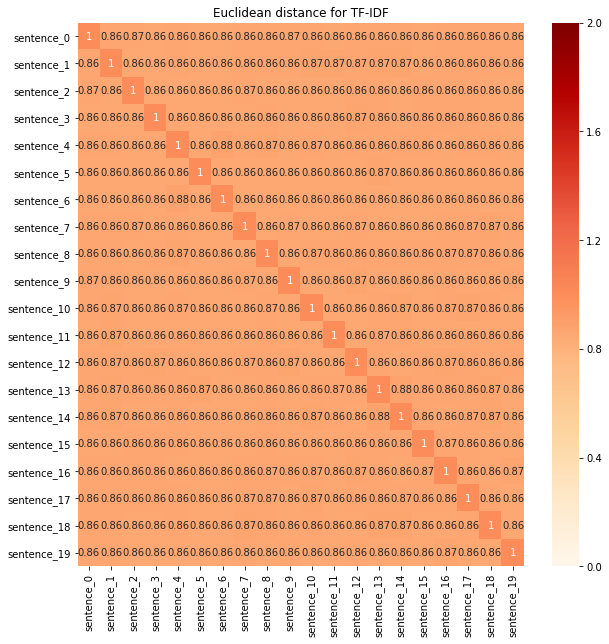

In [72]:
from sklearn.metrics.pairwise import euclidean_distances

edl = euclidean_distances(tf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = edl[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, 10)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Euclidean distance for TF-IDF')
ax = sns.heatmap(df_todraw,cmap = "OrRd", vmin = 0, vmax = 2, annot = True)

# Manhattan distance

# Word frequency

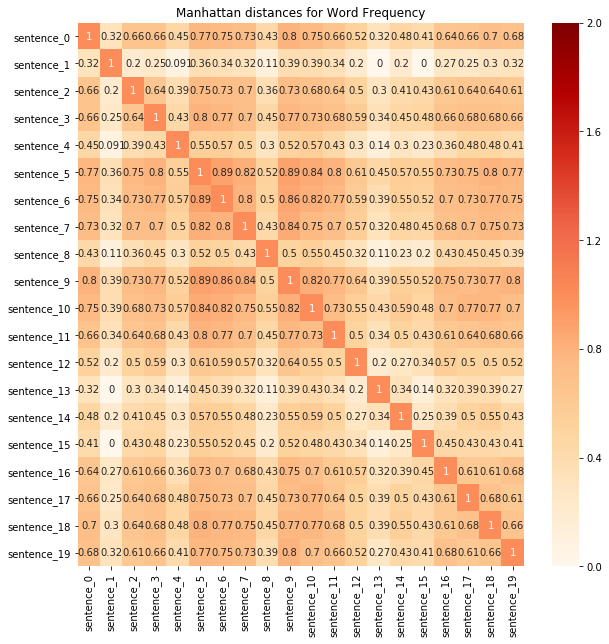

In [73]:
from sklearn.metrics.pairwise import manhattan_distances

ed2_1 = manhattan_distances(wf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed2_1[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Manhattan distances for Word Frequency')
ax = sns.heatmap(df_todraw,cmap = "OrRd", vmin = 0, vmax = 2, annot = True)

# TF-IDF

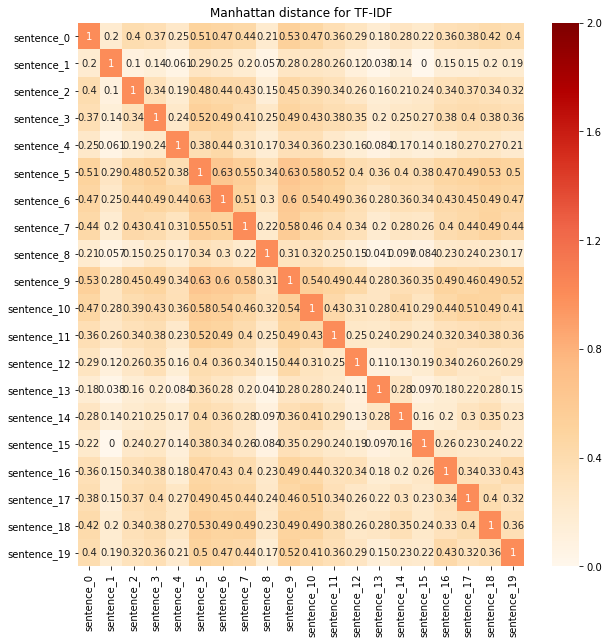

In [74]:
from sklearn.metrics.pairwise import manhattan_distances

ed2_2 = manhattan_distances(tf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed2_2[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Manhattan distance for TF-IDF')
ax = sns.heatmap(df_todraw,cmap = "OrRd", vmin = 0, vmax = 2, annot = True)

# Cosine similarity
0 means same, 1 means totally diff

# Word frequency

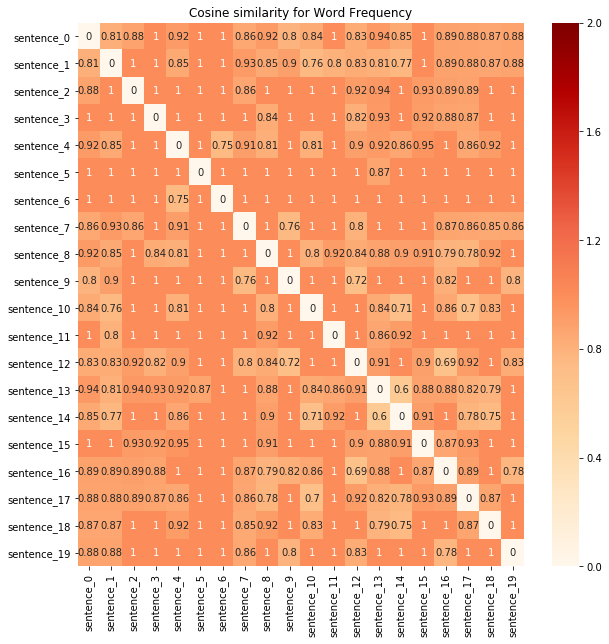

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
ed3_1 = cosine_similarity(wf_counts)

## Plot

plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed3_1[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Cosine similarity for Word Frequency')
ax = sns.heatmap(df_todraw,cmap = "OrRd", vmin = 0, vmax = 2, annot = True)

# TF-IDF

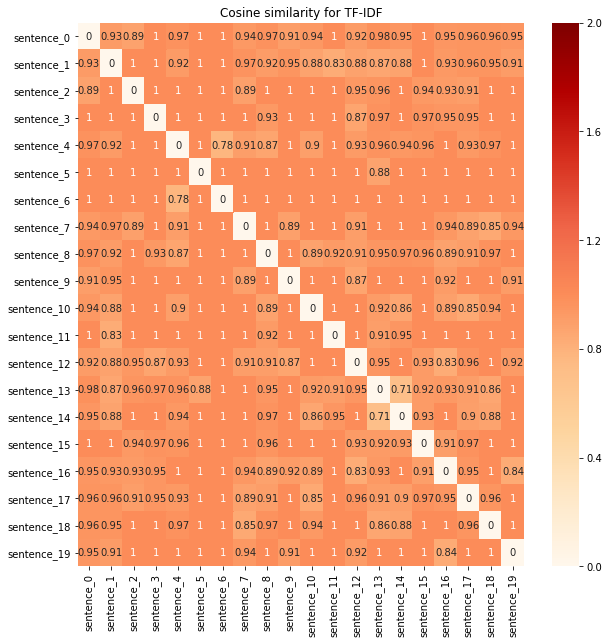

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
ed3_2 = cosine_similarity(tf_counts)

## Plot
plot_x = ["sentence_" + str(i) for i in range(20)]
plot_y = ["sentence_" + str(i) for i in range(20)]
plot_z = ed3_2[0:20, 0:20]

## Normalization
max = plot_z.max()
norm = np.around((1 - np.true_divide(plot_z, max)), decimals = 5)

df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
plt.title('Cosine similarity for TF-IDF')
ax = sns.heatmap(df_todraw,cmap = "OrRd", vmin = 0, vmax = 2, annot = True)

# Naive Bayes classifier -- Multinomial naive Bayes

# Word frequency

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split 
from sklearn.cross_validation import cross_val_score

X_counts_array = X_counts.toarray()
X_score = X['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_counts_array, X_score, test_size = 0.25)

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

acc = cross_val_score(mnb, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()
y_pred = mnb.predict(X_test)
print('Accuracy (Word Frequency): {:.3f}'.format(acc))
print(classification_report(Y_test, y_pred))

C:\Users\ParkerLai\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy (Word Frequency): 0.807
             precision    recall  f1-score   support

        0.0       0.83      0.84      0.84       378
        1.0       0.83      0.82      0.83       364

avg / total       0.83      0.83      0.83       742



# TF-IDF

In [79]:
X_tf_array = X_tf.toarray()
X_score = X['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_tf_array, X_score, test_size = 0.25)

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

acc = cross_val_score(mnb, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()
y_pred = mnb.predict(X_test)
print('Accuracy (TF-IDF): {:.3f}'.format(acc))
print(classification_report(Y_test, y_pred))

Accuracy (TF-IDF): 0.811
             precision    recall  f1-score   support

        0.0       0.80      0.88      0.84       370
        1.0       0.87      0.78      0.82       372

avg / total       0.84      0.83      0.83       742



# End